In [69]:
import pandas as pd

df = pd.read_csv('./ads_analysis_data_restructured.csv')


In [70]:
grouped_df = df.groupby(['Set', 'Persona']).mean()



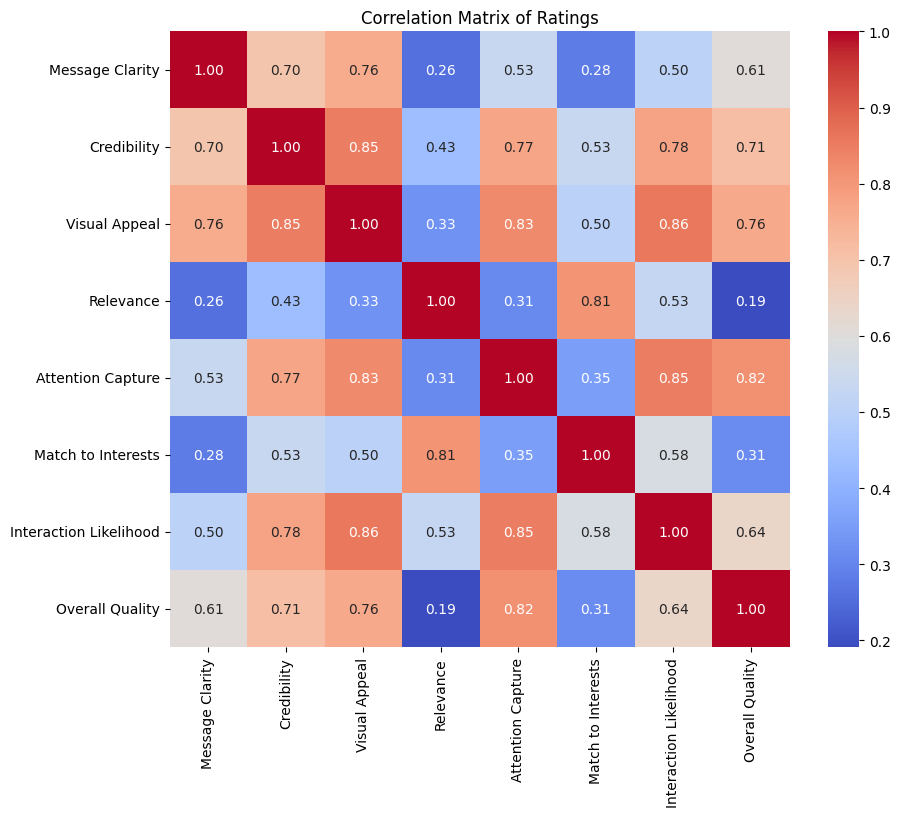

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.filter(like='mean').corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            xticklabels=[
                'Message Clarity', 'Credibility', 'Visual Appeal', 'Relevance', 
                'Attention Capture', 'Match to Interests', 'Interaction Likelihood', 
                'Overall Quality'
            ],
            yticklabels=[
                'Message Clarity', 'Credibility', 'Visual Appeal', 'Relevance', 
                'Attention Capture', 'Match to Interests', 'Interaction Likelihood', 
                'Overall Quality'
            ])
plt.title('Correlation Matrix of Ratings')
plt.show()




Analysis for Match to Interests
               Model       MSE  R-squared
0  Linear Regression  1.422030  -2.656649
1   Ridge Regression  1.324922  -2.406942
2   Lasso Regression  0.194425   0.500051
3      Decision Tree  0.243667   0.373429
4      Random Forest  0.108329   0.721440
5                SVR  1.852598  -3.763825
Best model: Random Forest


<Figure size 1000x600 with 0 Axes>

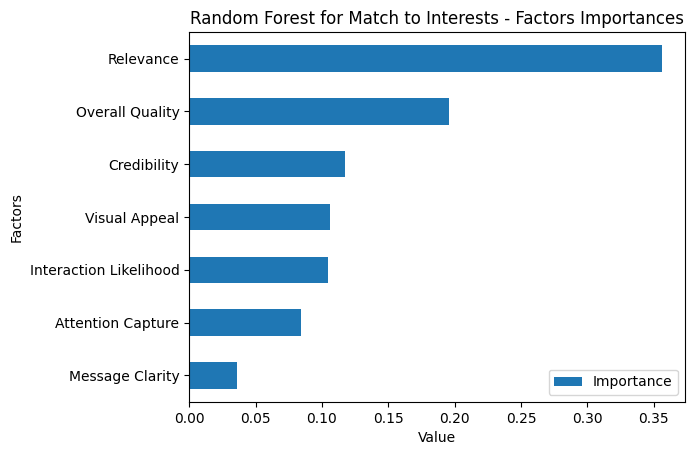



Analysis for Credibility
               Model       MSE  R-squared
0  Linear Regression  1.036494   0.421491
1   Ridge Regression  0.926170   0.483068
2   Lasso Regression  1.445843   0.193018
3      Decision Tree  1.538733   0.141172
4      Random Forest  1.415327   0.210050
5                SVR  0.585292   0.673325
Best model: SVR


<Figure size 1000x600 with 0 Axes>

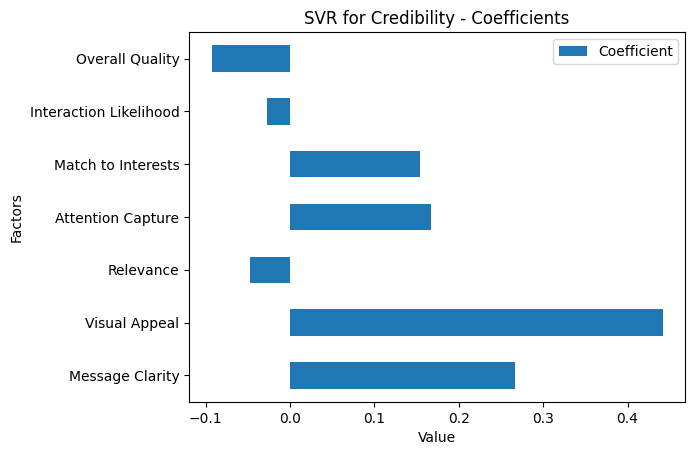



Analysis for Interaction Likelihood
               Model       MSE  R-squared
0  Linear Regression  0.201523   0.801238
1   Ridge Regression  0.193892   0.808764
2   Lasso Regression  0.778334   0.232328
3      Decision Tree  1.512567  -0.491847
4      Random Forest  0.736697   0.273394
5                SVR  0.193833   0.808822
Best model: SVR


<Figure size 1000x600 with 0 Axes>

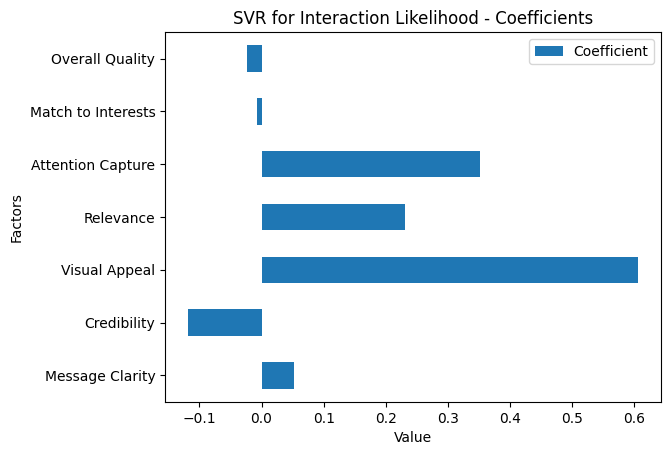

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def prepare_data(df, dependent_var, independent_vars, independent_labels):
    X = df[independent_vars]
    y = df[dependent_var]
    X.columns = independent_labels
    return train_test_split(X, y, test_size=0.2, random_state=42)

def fit_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=0.1),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42),
        'SVR': SVR(kernel='linear')
    }
    
    results = {'Model': [], 'MSE': [], 'R-squared': [], 'Model_Object': []}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results['Model'].append(name)
        results['MSE'].append(mse)
        results['R-squared'].append(r2)
        results['Model_Object'].append(model)
        
    return pd.DataFrame(results)

def plot_model_features(model, feature_names, title):
    plt.figure(figsize=(10, 6))
    
    if hasattr(model, 'coef_'): 
        coefficients = pd.DataFrame(model.coef_.reshape(-1, 1), index=feature_names, columns=['Coefficient'])
        coefficients.plot(kind='barh')
        plt.title(f'{title} - Coefficients')
    elif hasattr(model, 'feature_importances_'): 
        importances = pd.DataFrame(model.feature_importances_.reshape(-1, 1), index=feature_names, columns=['Importance'])
        importances.sort_values(by='Importance', ascending=True).plot(kind='barh')
        plt.title(f'{title} - Factors Importances')
    else:
        print(f"No suitable plot available for {type(model).__name__}")
        return
    
    plt.xlabel('Value')
    plt.ylabel('Factors')
    plt.show()

def analyze_question(df, dependent_var, independent_vars, independent_labels_map, title):
    # Map the independent variables 
    independent_labels = [independent_labels_map[var] for var in independent_vars]
    
    X_train, X_test, y_train, y_test = prepare_data(df, dependent_var, independent_vars, independent_labels)
    results_df = fit_and_evaluate_models(X_train, X_test, y_train, y_test)
    
    # Selecting the best model
    best_model_idx = results_df['R-squared'].idxmax()
    best_model = results_df.iloc[best_model_idx]['Model_Object']
    
    print(f'Analysis for {title}')
    print(results_df[['Model', 'MSE', 'R-squared']])
    print(f'Best model: {results_df.iloc[best_model_idx]["Model"]}')
    
    plot_model_features(best_model, X_train.columns, title=f'{results_df.iloc[best_model_idx]["Model"]} for {title}')
    print('\n')

independent_labels_map = {
    'q1_mean': 'Message Clarity',
    'q2_mean': 'Credibility',
    'q3_mean': 'Visual Appeal',
    'q4_mean': 'Relevance',
    'q5_mean': 'Attention Capture',
    'q6_mean': 'Match to Interests',
    'q7_mean': 'Interaction Likelihood',
    'q8_mean': 'Overall Quality'
}

analyze_question(df, 'q6_mean', ['q1_mean', 'q2_mean', 'q3_mean', 'q4_mean', 'q5_mean', 'q7_mean', 'q8_mean'], independent_labels_map, 'Match to Interests')
analyze_question(df, 'q2_mean', ['q1_mean', 'q3_mean', 'q4_mean', 'q5_mean', 'q6_mean', 'q7_mean', 'q8_mean'], independent_labels_map, 'Credibility')
analyze_question(df, 'q7_mean', ['q1_mean', 'q2_mean', 'q3_mean', 'q4_mean', 'q5_mean', 'q6_mean', 'q8_mean'], independent_labels_map, 'Interaction Likelihood')
analyze_question(df, 'q1_mean', ['q2_mean', 'q3_mean', 'q4_mean', 'q5_mean', 'q6_mean', 'q7_mean', 'q8_mean'], independent_labels_map, 'Message Clarity')




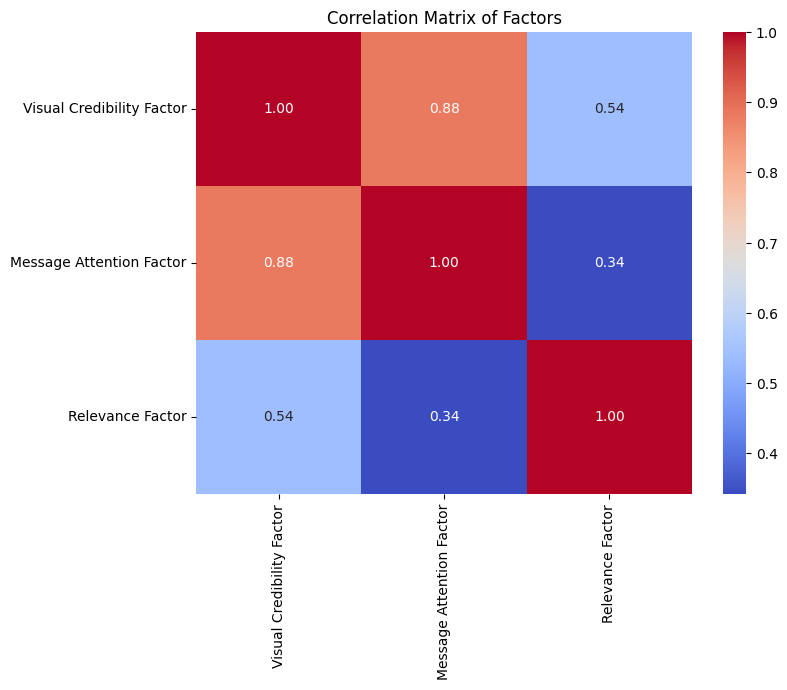

In [73]:
import pandas as pd

df['Visual Credibility Factor'] = df[['q3_mean', 'q2_mean', 'q7_mean']].mean(axis=1)

df['Message Attention Factor'] = df[['q1_mean', 'q5_mean', 'q8_mean']].mean(axis=1)

df['Relevance Factor'] = df[['q4_mean', 'q6_mean']].mean(axis=1)

factor_corr_matrix = df[['Visual Credibility Factor', 'Message Attention Factor', 'Relevance Factor']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(factor_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Factors')
plt.show()


In [74]:
from scipy.stats import f_oneway

anova_result = f_oneway(
    df[df['Set'] == 0]['q6_mean'],
    df[df['Set'] == 1]['q6_mean'],
    df[df['Set'] == 2]['q6_mean'],
    df[df['Set'] == 3]['q6_mean'],
    df[df['Set'] == 4]['q6_mean']
)

print(f'ANOVA Result Set Q6: F-value = {anova_result.statistic}, p-value = {anova_result.pvalue}')

anova_result = f_oneway(
    df[df['Set'] == 0]['q7_mean'],
    df[df['Set'] == 1]['q7_mean'],
    df[df['Set'] == 2]['q7_mean'],
    df[df['Set'] == 3]['q7_mean'],
    df[df['Set'] == 4]['q7_mean']
)

print(f'ANOVA Result Set Q7: F-value = {anova_result.statistic}, p-value = {anova_result.pvalue}')




ANOVA Result Set Q6: F-value = 0.10063097391233093, p-value = 0.9797593275924429
ANOVA Result Set Q7: F-value = 0.2319125938565517, p-value = 0.9141417617458325


In [75]:
from scipy.stats import f_oneway
anova_result = f_oneway(
    df[df['Persona'] == 'Ryan Johnson']['q6_mean'],
    df[df['Persona'] == 'Jack Thompson']['q6_mean'],
    df[df['Persona'] == 'Olivia Ramos']['q6_mean'],
    df[df['Persona'] == 'Samantha Greene']['q6_mean'],
    df[df['Persona'] == 'Emily Watson']['q6_mean'],
    df[df['Persona'] == 'Emma Johnson']['q6_mean'],
    df[df['Persona'] == 'Sophie Reynolds']['q6_mean'],
    df[df['Persona'] == 'Emily Patel']['q6_mean'],
)

# Print the result
print(f'ANOVA Result Perosna Q6: F-value = {anova_result.statistic}, p-value = {anova_result.pvalue}')

from scipy.stats import f_oneway
anova_result = f_oneway(
    df[df['Persona'] == 'Ryan Johnson']['q7_mean'],
    df[df['Persona'] == 'Jack Thompson']['q7_mean'],
    df[df['Persona'] == 'Olivia Ramos']['q7_mean'],
    df[df['Persona'] == 'Samantha Greene']['q7_mean'],
    df[df['Persona'] == 'Emily Watson']['q7_mean'],
    df[df['Persona'] == 'Emma Johnson']['q7_mean'],
    df[df['Persona'] == 'Sophie Reynolds']['q7_mean'],
    df[df['Persona'] == 'Emily Patel']['q7_mean'],
)

# Print the result
print(f'ANOVA Result Perosna Q7: F-value = {anova_result.statistic}, p-value = {anova_result.pvalue}')


ANOVA Result Perosna Q6: F-value = 1.3144152276086571, p-value = 0.44918953332998135
ANOVA Result Perosna Q7: F-value = 1.6257853380234846, p-value = 0.37325352389378147


C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


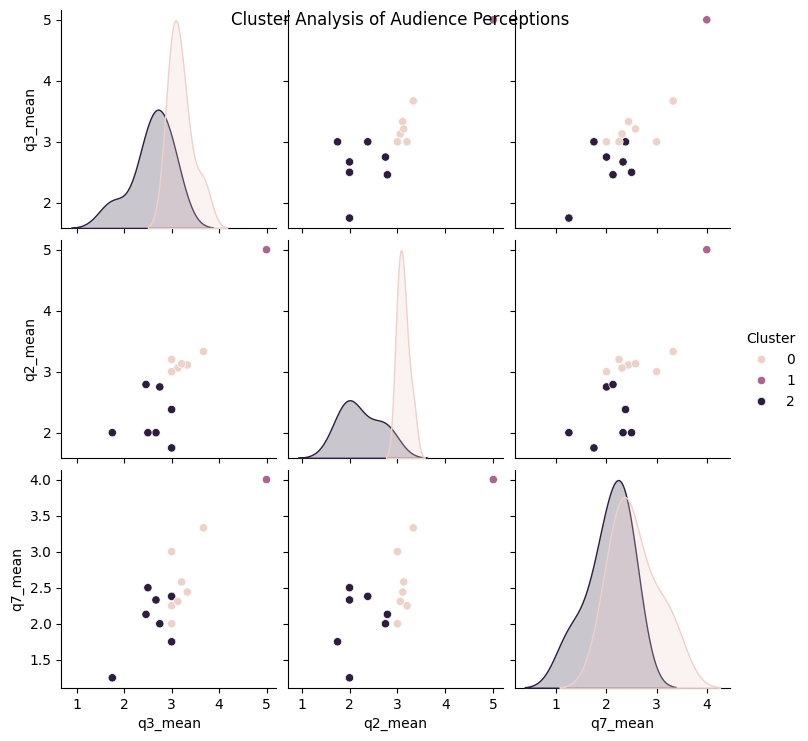

In [76]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

X = df[['q3_mean', 'q2_mean', 'q1_mean', 'q7_mean']]  

kmeans = KMeans(n_clusters=3) 
df['Cluster'] = kmeans.fit_predict(X)

sns.pairplot(df, hue='Cluster', vars=['q3_mean', 'q2_mean', 'q7_mean'])
plt.suptitle('Cluster Analysis of Audience Perceptions')
plt.show()


In [110]:
import pandas as pd
from textblob import TextBlob


data = {
    'Q1': [
        "It feels artificial, limited in information and very generic.",
        "It doesn’t look real. The large hotel is crookedly built!",
        "The image looks computer-generated.",
        "The landscape",
        "It should have a stronger caption, something that engages me more.",
        "The right side looks touristic, but the building seems like a school, which makes the ad lose its appeal.",
        "Distribution of the elements",
        "The image is not eye-catching, the text is not relatable, it feels very mechanical.",
        "The mountains, the snow the jacuzzi",
        "Good topic, good offer. But the image gives an artificial impression, and the text in the image is too large and intrusive.",
        "Location",
        "The images are extremely artificial… incompatible with the real experience the ad proposes.",
        "I just generally don't interact with ads",
        "No",
        "The headphones that appear twice. The choice of words in the caption. The placement and implementation of the text on the image. These are crucial points why I don't react to them.",
        "The image is cool.",
        "You could make a picture of any earplugs and apply the same text. Why would I buy this? It is not convincing me in any way to buy this.",
        "Graphic",
        "Too much textures, seems distracting.",
        "Utility, comfort, necessary",
        "Illusion",
        "None of the above",
        "The caption and the image colors",
        "The sole, the color, the illusion of smoke",
        "The image",
        "I like the shoes",
        "It’s not clear why it’s sustainable, nor do I know the material or additional information.",
        "Color scheme, text position in the image",
        "No interactúe solo porque no suelo comprar zapatos online",
        "The shoe design",
        "I like the shoe design.",
        "Imagen",
        "Mostly the specific item that I don't think it's my style, so these are the kind of shoes that I don't use so why bother on clicking, but otherwise I would have clicked it",
        "The ad is simple and does not catch my attention",
        "I usually never click on ads, I would also not click on that one but I really like the image of the shoe, it looks very appealing and very detailed.",
        "Because it isn't explained enough",
        "No",
        "Inconspicuous typography, the shoes do not look natural, and the material used in the shoes is not to my liking",
        "The picture",
        "The picture",
        "The font is difficult to read, I would not set the cut in italic and set the direction from left to right. Looks so very strange. In addition, the subject does not fit the message - at first I thought it was advertising a winter holiday.",
        "The sportsman picture",
        "The price",
        "It's too simple. Personally, that shot does not inspire me at all towards the situation, besides, the text on the top right corner takes up too much of the screen and makes it more boring",
        "Snow, Nature, Mountain",
        "The landscape",
        "There is not enough focus on food and the text is too long, it needs to be more concise",
        "Font not easy to read",
        "Curiosity",
        "“Explore” has the same color as the background - photography doesn’t stand out - No main object in the picture",
        "El paisaje",
        "I am aware that it is made or with image arrangement or AI, so it captures me to find things that look unreal, very strange, like trees, they capture all my attention.",
        "I don’t know which clues, the text looks dummy",
        "I don't have snow in my country... I'm not interested",
        "Image of skier and mountain base on ice",
        "The picture seems kind of unreal, therefore I don't really know what to expect if I want to book the 2 night stay.",
        "Too much table, product very small",
        "Not very creative, doesn’t look very real",
        "Image and text",
        "I don’t see it clearly",
        "It doesn’t look realistic portion as there is one whole french loaf with the bread basket. This picture doesn’t tell the realistic picture you would get.",
        "The dish",
        "The look of the table is not pleasant",
        "It has a very attractive color palette",
        "Simple",
        "Too much wood to see, too much white bread, too little salad. Not appealing at all.",
        "Its all fake, too clean to be real",
        "It’s too simple, visually not attractive",
        "Is a restaurant advertised here? Or a product that can be purchased in the supermarket? Not entirely clear... text too flowery at the end. 'Health and Exploration'??",
        "I rarely respond to ads in principle",
        "The picture"
    ],
    'Q2': [
        "Na",
        "No, not a nice picture.",
        "Shocking",
        "Tranquility",
        "No",
        "Interest, in the quality of the image.",
        "Liking the food",
        "Falseness",
        "Happiness",
        "No comment",
        "Tranquility",
        "It brought me emotions from when I watched Harry Potter for the first time.",
        "No comment",
        "No comment",
        "Rejection due to dubiousness",
        "Amazement",
        "Nope, just another ad. Nothing special",
        "Dynamics",
        "No comment",
        "Trust",
        "Nein",
        "No comment",
        "Cuteness",
        "Beauty, style, delicacy",
        "Trust",
        "No comment",
        "No comment",
        "No comment",
        "No",
        "Nothing",
        "Resolution",
        "Trust",
        "Curiosity I guess, that's what most ads do to me",
        "No comment",
        "I think it looks pretty cool but I either don't feel anything for ads or have more negative thoughts / feel very annoyed which leads to never buying this product from this company.",
        "No",
        "No comment",
        "Disgust, the ad is mediocre.",
        "Thrill",
        "Thrill",
        "Excitement about the poor graphics skills",
        "Happiness",
        "No",
        "Indifference",
        "Happiness, Freedom",
        "Tranquility",
        "No comment",
        "Tension",
        "No comment",
        "No comment",
        "Intrigue",
        "Uncomfortable",
        "No",
        "No",
        "Thrill",
        "Rest, peace and nature.",
        "No comment",
        "No, nothing.",
        "Happiness",
        "No",
        "Picture is good and beautiful but doesn’t make me excited because the portion looks unrealistic",
        "Health",
        "No comment",
        "No",
        "Happiness",
        "No",
        "No comment",
        "No comment",
        "No",
        "No comment",
        "No"
    ]
}

f = pd.DataFrame(data)

# TextBlob Sentiment Analysis
def get_sentiment_category(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to Q1 and Q2 separately
df['Sentiment_Q1'] = df['Q1'].apply(get_sentiment_category)
df['Sentiment_Q2'] = df['Q2'].apply(get_sentiment_category)

# Count the occurrences of each sentiment for Q1 and Q2
sentiment_counts_q1 = df['Sentiment_Q1'].value_counts()
sentiment_counts_q2 = df['Sentiment_Q2'].value_counts()

# Create DataFrames to display the results in a table
sentiment_table_q1 = pd.DataFrame({
    'Sentiment': ['Positive', 'Negative', 'Neutral'],
    'Q1_Count': [
        sentiment_counts_q1.get('Positive', 0),
        sentiment_counts_q1.get('Negative', 0),
        sentiment_counts_q1.get('Neutral', 0)
    ]
})

sentiment_table_q2 = pd.DataFrame({
    'Sentiment': ['Positive', 'Negative', 'Neutral'],
    'Q2_Count': [
        sentiment_counts_q2.get('Positive', 0),
        sentiment_counts_q2.get('Negative', 0),
        sentiment_counts_q2.get('Neutral', 0)
    ]
})

# Merge the two tables into one for better readability
sentiment_table = pd.merge(sentiment_table_q1, sentiment_table_q2, on='Sentiment')

# Display the table
print(sentiment_table.to_string(index=False))



Sentiment  Q1_Count  Q2_Count
 Positive        22        10
 Negative        13         6
  Neutral        36        55
